In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline
from my_plot import set_size
import seaborn as sns
width =  508.0
widthcol = 244
plt.rcParams['font.size']=12

from matplotlib.ticker import LogLocator
from scipy.optimize import curve_fit
from sympy import symbols, simplify, diff, lambdify, exp

%matplotlib widget

In [2]:
def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        coefficient=float(coefficient)
        if (coefficient == 1.00):
            return f"$ 10^{{{exponent}}}$"  # Notazione LaTeX
        else: 
            return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX
            return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [3]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.726 #K
I0 =(2*K**3*T**3)/(vc**2*h_pl**2)*1e26

In [4]:
G = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2 * I0 #intensity not occupation number
Y = lambda x: G(x) * ( x* (np.exp(x)+1)/(np.exp(x)-1)-4 ) 
M = lambda x: G(x)* (0.45614425920673529191-1.0/x) 

Jref= lambda x:  np.exp(-(x/1.98e+6)**(5/2)) 


In [5]:
zh = [2e6,5e5,3e5,1e5,4e5,1e4]

In [6]:

folder = 'outputs/parametrisation/batch/PDE-non-linear/'

nu = []
x = []
IN = []

for i in range (len(zh)):
    file_path = os.path.join(folder,f"Dn_final.delta-z_Greens_z_h_00{i+1}.dat")
    HC = pd.read_csv(file_path, skiprows=7, delimiter=' ', header=None)
    nu.append(HC.iloc[:, 1].values)    #frequency in Ghz
    x.append(HC.iloc[:, 0].values  )  
    IN.append(HC.iloc[:, 5].values)



In [7]:
zh[0]

2000000.0

In [8]:
x[0][x[0]<0.116761]

array([1.00000000e-10, 1.01392073e-10, 1.02803525e-10, ...,
       1.04968323e-01, 1.09936646e-01, 1.14904968e-01])

In [9]:
np.where(np.isclose(x[0], 0.11490497))


(array([1502]),)

In [10]:
IN[1][336]/IN[0][336] #this is the multiplicative factor we need to use to find ad exact superposition of the two

2.836224248005265

In [11]:
label = f"zh={sci_notation(zh[i])}"

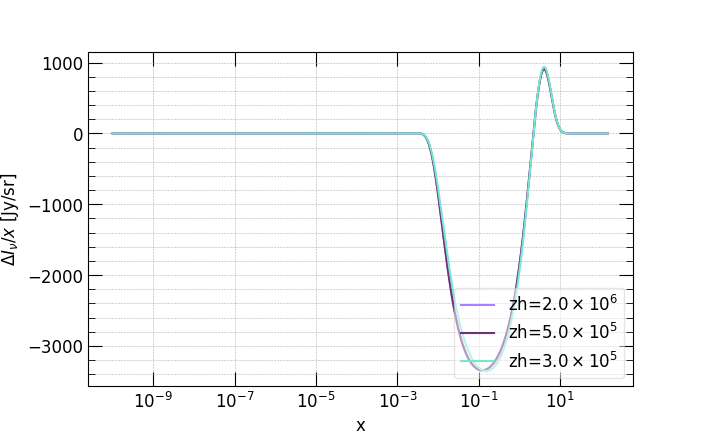

In [12]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")
colors4 = ["#a682ff","#712f79","#76e7cd","#e55812","#0e7c7b","black"]


ax1.plot(x[0],IN[0]*2.8356085225645864/x[0], label = f"zh={sci_notation(zh[0])}", color= colors4[0])
ax1.plot(x[1],IN[1]/x[1], label = f"zh={sci_notation(zh[1])}", color= colors4[1])
ax1.plot(x[2],IN[2]/x[2], label = f"zh={sci_notation(zh[2])}", color= colors4[2])
#ax1.plot(x[3],IN[3]/x[3], label = f"zh={sci_notation(zh[3])}", color= colors4[3])
#ax1.plot(x[4],IN[4]/x[4], label = f"zh={sci_notation(zh[4])}", color= colors4[4])
#ax1.plot(x[5],IN[5]/x[5], label = f"zh={sci_notation(zh[5])}", color= colors4[5])





ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}/x$ [Jy/sr]")

#ax1.set_xlabel("$\\nu$ [GHz]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
#ax1.text(1e-3,500, "$z_{\\rm h} = 5 \\times 10^5$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
plt.legend(loc='lower right',fancybox=True, framealpha=0.5)  #loc="upper left", bbox_to_anchor=(1.0, 1)

plt.savefig('outputs/p4p/fit.pdf', dpi=300,bbox_inches="tight")
plt.show()

2e6 and 5e5 agree but not at low frequencies are different are different because xc changes with redshift. Ignore that part for now, we are not interested. It influences the mu apmplitude.

1) we take 2e6 as a reference (or 5e6) of a pure mu distortion. We see that looking at the scaling factor in the minimum they concide exactly. This is not completely true at low frequency: because the amplitude of mu deoends on xc that in turins depends on the redshift


2) c^2/2*h*nu^3 * DI = mu*M*(x)= 1/I0*x^3 DIN
    we want to obtain the number density spectral distortion


In [13]:
Dn = 1/(I0*x[1]**3)*IN[1]

3. We know Jbb, we can find the value of mu, e then extract M* !=M. We have a new pure distorton!

In [14]:
file_path2 = os.path.join(folder,f"Greens/Dn_0.delta-z_Greens_z_h_002.dat")

op = pd.read_csv(file_path2, skiprows= lambda x: x not in [19], delimiter=' ', header=None)
Jbb_5e5h= op.iat[0,1]
mu_5e5h = 1.401e-5 * Jbb_5e5h
print(mu_5e5h)

1.3369425681094291e-05


In [15]:
newM = Dn/mu_5e5h

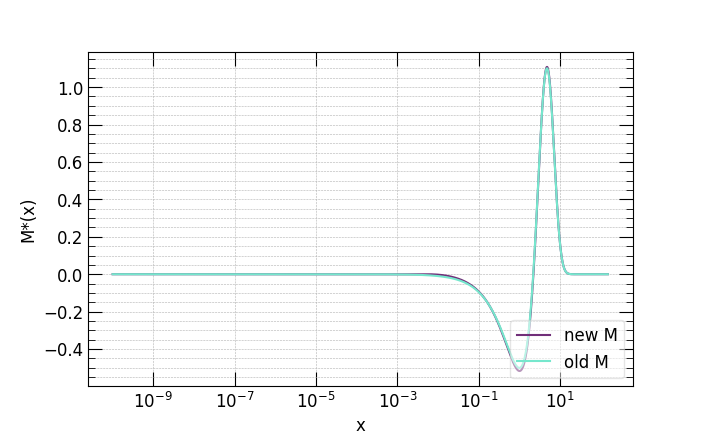

In [16]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")
colors4 = ["#a682ff","#712f79","#76e7cd","#e55812","#0e7c7b","black"]


#ax1.plot(x[0],IN[0]*2.8356085225645864/x[0], label = f"zh={sci_notation(zh[0])}", color= colors4[0])
ax1.plot(x[1],newM*x[1]**3, label = f"new M", color= colors4[1])
ax1.plot(x[1],M(x[1])/(I0), label = "old M", color= colors4[2])
#ax1.plot(x[3],IN[3]/x[3], label = f"zh={sci_notation(zh[3])}", color= colors4[3])
#ax1.plot(x[4],IN[4]/x[4], label = f"zh={sci_notation(zh[4])}", color= colors4[4])
#ax1.plot(x[5],IN[5]/x[5], label = f"zh={sci_notation(zh[5])}", color= colors4[5])





ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([-3000, 500])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("M*(x)")

#ax1.set_xlabel("$\\nu$ [GHz]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
#ax1.text(1e-3,500, "$z_{\\rm h} = 5 \\times 10^5$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
plt.legend(loc='lower right',fancybox=True, framealpha=0.5)  #loc="upper left", bbox_to_anchor=(1.0, 1)

#plt.savefig('outputs/p4p/fit.pdf', dpi=300,bbox_inches="tight")
plt.show()

4. Print now a table with the values of this

In [17]:
matrix= open("newM.dat","w")
matrix.write("########################################################"+"\n")
matrix.write("x         M"+"\n")
for i in range(len(x[1])):
    matrix.write(str(x[1][i])+" "+str(newM[i])+"\n")

# Import the data for the new frequency hierarchy with the new treatment

In [29]:
folder2_1 = 'outputs/parametrisation/new-FH'

xyn_2e6= []
DIyn_2e6= []
file_path = os.path.join(folder2_1, "FH-2e6/full_spectrum.dat_ymax15_y_bg.spec")
op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)

xyn_2e6.append(op.iloc[:, 0].values)
DIyn_2e6.append((op.iloc[:, 1].values)) #unit of measure are different!

In [30]:
#folder2_1 = 'outputs/parametrisation/new-FH'

xyn_3e5= []
DIyn_3e5= []
file_path = os.path.join(folder2_1, "FH-3e5/full_spectrum.dat_ymax15_y_bg.spec")
op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)

xyn_3e5.append(op.iloc[:, 0].values)
DIyn_3e5.append((op.iloc[:, 1].values)) #unit of measure are different!

In [31]:
#folder2_1 = 'outputs/parametrisation/new-FH'

xyn_5e5= []
DIyn_5e5= []
file_path = os.path.join(folder2_1, "FH-5e5/full_spectrum.dat_ymax15_y_bg.spec")
op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)

xyn_5e5.append(op.iloc[:, 0].values)
DIyn_5e5.append((op.iloc[:, 1].values)) #unit of measure are different!

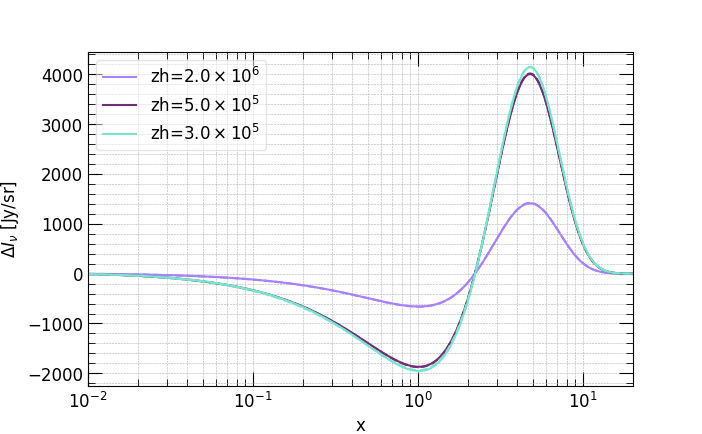

In [35]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")
colors4 = ["#a682ff","#712f79","#76e7cd","#e55812","#0e7c7b","black"]


ax1.plot(x[0],IN[0], label = f"zh={sci_notation(zh[0])}", color= colors4[0])
ax1.plot(xyn_2e6[0],DIyn_2e6[0], color= colors4[0] , linestyle = "--")

ax1.plot(x[1],IN[1], label = f"zh={sci_notation(zh[1])}", color= colors4[1])
ax1.plot(xyn_5e5[0],DIyn_5e5[0], color= colors4[1], linestyle = "--")

ax1.plot(x[2],IN[2], label = f"zh={sci_notation(zh[2])}", color= colors4[2])
ax1.plot(xyn_3e5[0],DIyn_3e5[0],  color= colors4[2], linestyle = "--")






ax1.set_xscale('log')
ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")

#ax1.set_xlabel("$\\nu$ [GHz]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
#ax1.text(1e-3,500, "$z_{\\rm h} = 5 \\times 10^5$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
plt.legend(loc='best',fancybox=True, framealpha=0.5)  #loc="upper left", bbox_to_anchor=(1.0, 1)

plt.savefig('outputs/p4p/fit.pdf', dpi=300,bbox_inches="tight")
plt.show()

In [33]:
DIyn_5e5

[array([ 1.66995525e-03,  1.74401904e-03,  1.82137091e-03,  1.90215690e-03,
         1.98652956e-03,  2.07464820e-03,  2.16667922e-03,  2.26279637e-03,
         2.36318115e-03,  2.46802309e-03,  2.57752012e-03,  2.69187900e-03,
         2.81131559e-03,  2.93605538e-03,  3.06633384e-03,  3.20239688e-03,
         3.34450131e-03,  3.49291532e-03,  3.64791902e-03,  3.80980487e-03,
         3.97887833e-03,  4.15545837e-03,  4.33987800e-03,  4.53248495e-03,
         4.73364210e-03,  4.94372815e-03,  5.16313786e-03,  5.39228243e-03,
         5.63158931e-03,  5.88150165e-03,  6.14247680e-03,  6.41498355e-03,
         6.69949749e-03,  6.99649326e-03,  7.30643296e-03,  7.62974839e-03,
         7.96681541e-03,  8.31791715e-03,  8.68319275e-03,  9.06256675e-03,
         9.45565436e-03,  9.86163521e-03,  1.02790896e-02,  1.07057874e-02,
         1.11384215e-02,  1.15722764e-02,  1.20008191e-02,  1.24152065e-02,
         1.28036942e-02,  1.31509421e-02,  1.34372051e-02,  1.36374062e-02,
         1.3